In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
openFoamFolder = r"Results_OF/"
openFoamResults = os.listdir(openFoamFolder)
openFoamResults.sort()

stanmodFolder = r"CFITIM/"
stanmodResults = os.listdir(stanmodFolder)
stanmodResults.sort()

In [4]:
cases = {f.split('.')[0]:{'modeled':pd.read_csv(openFoamFolder+f),\
                          'analytic':pd.read_csv(stanmodFolder+f2),\
                          'porosity':0.35,'lenght':1.0,'katt':1.0E-4,'initConc':1.0}\
         for f,f2 in zip(openFoamResults,stanmodResults)}

darcyVels = [3.5E-5,3.5E-5,3.5E-4]
kdettachs = [1.0E-5,1.0E-6,1.0E-4]
myColors  = ['crimson','indigo','olive']

for i,v in enumerate(cases.values()):
    v['kdet'],v['qDar'],v['color'] = kdettachs[i],darcyVels[i],myColors[i]

In [5]:
for v in cases.values():
    case = v['modeled']
    case['t'] = ( case['Time'] * v['qDar'] ) / (v['lenght'] * v['porosity'])
    case['C'] = case['Cw'] / v['initConc']

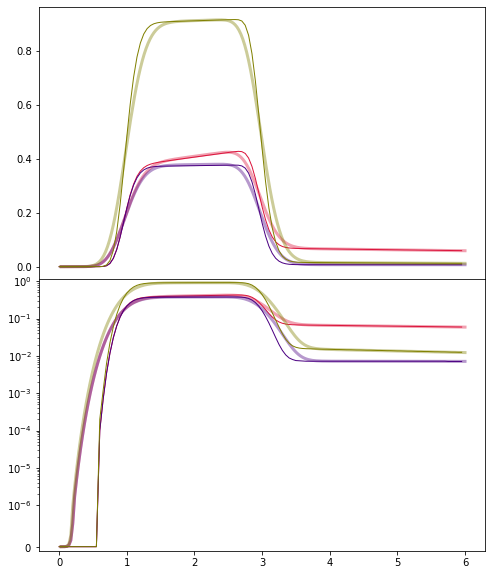

In [6]:
fig,axs = plt.subplots(2,1,figsize=[8,10],facecolor='white',sharex=True,\
                      gridspec_kw={'hspace':0})

## Linear
for ax in axs:
    for case in cases.values():
        modl = case['modeled']
        calc = case['analytic']
        ax.plot(modl['t'],modl['C'],alpha=0.4,lw=3,color=case['color'])
        ax.plot(calc['t'],calc['C'],lw=1,color=case['color'])

axs[1].set_yscale("symlog",linthresh=1.0E-6,subs=[1,2,3,4,5,6,7,8,9])
axs[1].set_ylim([-1.0E-7,1.15])
plt.show()